In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv',parse_dates = ['date'], index_col = 'date')
df_test = pd.read_csv('DailyDelhiClimateTest.csv',parse_dates = ['date'], index_col = 'date')

In [20]:
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [21]:
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [22]:
type(df_train.index)

pandas.core.indexes.datetimes.DatetimeIndex

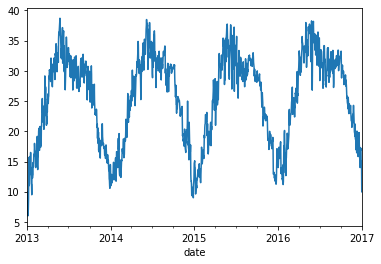

In [23]:
df_train['meantemp'].plot()

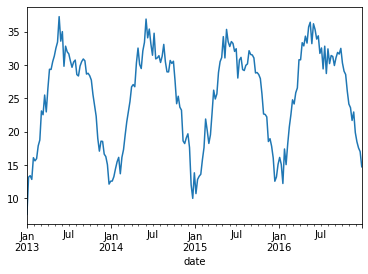

In [24]:
df_train['meantemp'].resample('7D').mean().plot()

In [25]:
df_train = df_train.resample('7D').mean()
df_test = df_test.resample('7D').mean()
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2013-01-01 to 2016-12-27
Freq: 7D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      209 non-null    float64
 1   humidity      209 non-null    float64
 2   wind_speed    209 non-null    float64
 3   meanpressure  209 non-null    float64
dtypes: float64(4)
memory usage: 8.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2017-01-01 to 2017-04-23
Freq: 7D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      17 non-null     float64
 1   humidity      17 non-null     float64
 2   wind_speed    17 non-null     float64
 3   meanpressure  17 non-null     float64
dtypes: float64(4)
memory usage: 680.0 bytes


In [26]:
# check stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_train['meantemp'])
labels = ['ADF Test Statistic', 'p-value','#Lags Used', "number of Observations Used"]

for value,label in zip(result, labels):
    print(label,':',value)

if result[1] <= 0.05:
    print('Data is stationary.')
else:
    print('Data is not stationary.')

ADF Test Statistic : -4.840515350180194
p-value : 4.5467837149528617e-05
#Lags Used : 6
number of Observations Used : 202
Data is stationary.


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2013-01-01 to 2016-12-27
Freq: 7D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      209 non-null    float64
 1   humidity      209 non-null    float64
 2   wind_speed    209 non-null    float64
 3   meanpressure  209 non-null    float64
dtypes: float64(4)
memory usage: 8.2 KB


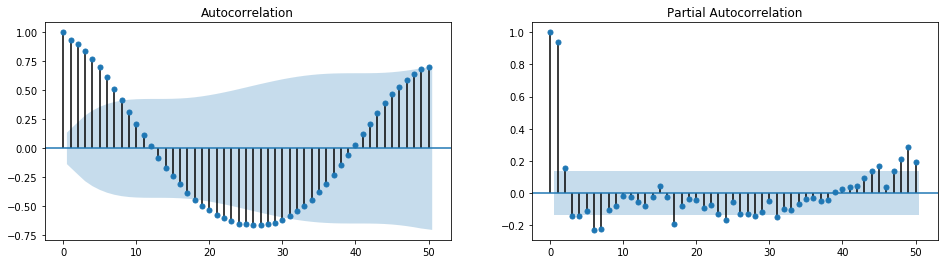

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
plot_acf(df_train['meantemp'], lags=50, ax=ax[0])
plot_pacf(df_train['meantemp'], lags=50, ax=ax[1])
plt.show()

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.tsa.statespace.SARIMAX(df_train['meantemp'], order = (2,0,1),seasonal_order = (2,0,1,52))
model_fit = model.fit()

C:\Users\veman\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\veman\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\veman\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\veman\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\veman\anaconda3\lib\site-

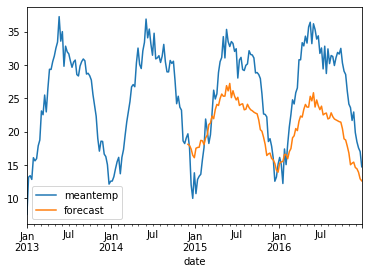

In [31]:
df_train['forecast'] = model_fit.predict(start = 100,end = 209,dynamic = True)
df_train[['meantemp','forecast']].plot()

In [37]:
output = model_fit.forecast(17)
mae = mean_absolute_error(output,df_test['meantemp'])
rmse = np.sqrt((mean_squared_error(output,df_test['meantemp'])))

print('mae : ',mae)
print('rmse: ',rmse)

mae :  2.397598645927996
rmse:  2.960052095216223


In [33]:
predictions = []
for i in range(17):
    predictions.append(output[i])
    
df_test['predicted_meantemp'] = predictions

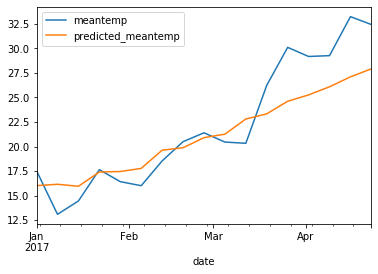

In [34]:
df_test[['meantemp','predicted_meantemp']].plot()